## IS 733 - Data Mining
### Lab5
### - Vinay Krishna Kumar

### 2(a)

In [2]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("C:/Users/vinay/Downloads/ROC_dataset.xlsx - template.csv")

In [4]:
def compute_tpr_fpr(data, threshold):
    # True Positives (TP): predicted positives that are true positives
    tp = sum((data['Prediction'] >= threshold) & (data['True_Label'] == 1))
    # False Positives (FP): predicted positives that are actually negatives
    fp = sum((data['Prediction'] >= threshold) & (data['True_Label'] == 0))
    # True Negatives (TN): predicted negatives that are true negatives
    tn = sum((data['Prediction'] < threshold) & (data['True_Label'] == 0))
    # False Negatives (FN): predicted negatives that are actually positives
    fn = sum((data['Prediction'] < threshold) & (data['True_Label'] == 1))

    # Total actual positives and negatives
    total_positives = sum(data['True_Label'] == 1)
    total_negatives = sum(data['True_Label'] == 0)

    # Calculate TPR and FPR
    tpr = tp / total_positives if total_positives else 0
    fpr = fp / total_negatives if total_negatives else 0

    return tpr, fpr

# Apply TPR and FPR computation for each threshold
results = []
for threshold in sorted(data['Prediction'].unique(), reverse=True):
    tpr, fpr = compute_tpr_fpr(data, threshold)
    results.append((threshold, tpr, fpr))

In [5]:
results_df = pd.DataFrame(results, columns=['Threshold', 'TPR', 'FPR'])
results_df.head()

,Threshold,TPR,FPR
0,0.998,0.041667,0.0
1,0.997,0.097222,0.0
2,0.996,0.125000,0.0
3,0.994,0.152778,0.0
4,0.992,0.166667,0.0


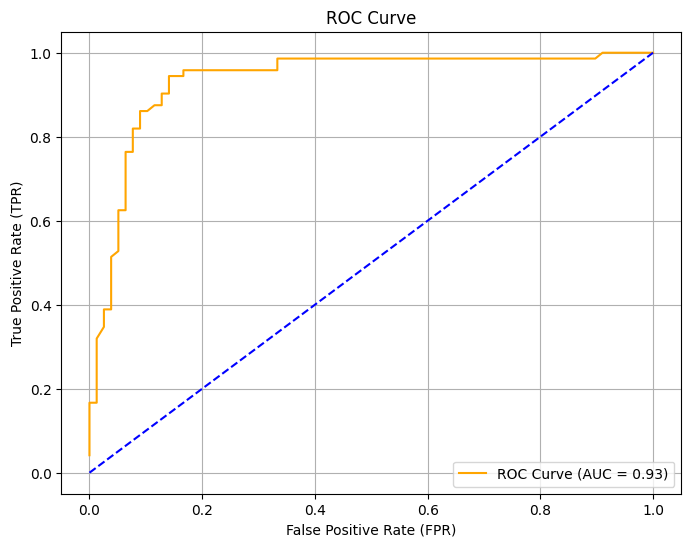

In [13]:
auc_score = auc(results_df['FPR'], results_df['TPR'])
plt.figure(figsize=(8, 6))
plt.plot(results_df['FPR'], results_df['TPR'], color='orange', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()

### 1(b)

In [43]:
training_data = pd.read_csv("D:/IS 733/Lab/Lab5/Training data.csv")
testing_data = pd.read_csv("D:/IS 733/Lab/Lab5/Testing data.csv")

training_data.head(), testing_data.head()

(  Dataset  Email_ID                                            Content  win  \
 0   train       1.0                 Click here to win a special prize!  1.0   
 1   train       2.0  Team meeting rescheduled. Check the portal and...  0.0   
 2   train       3.0              Claim your free vacation package now!  0.0   
 3   train       4.0  A reminder for tomorrow's team-building exercise.  0.0   
 4   train       5.0  Win a brand new car by participating in our su...  1.0   
 
    click  team  claim  reminder Category  
 0    1.0   0.0    0.0       0.0     Spam  
 1    1.0   1.0    0.0       0.0      Ham  
 2    0.0   0.0    1.0       0.0     Spam  
 3    0.0   1.0    0.0       1.0      Ham  
 4    0.0   0.0    0.0       0.0     Spam  ,
   Dataset  Email_ID                                            Content  win  \
 0    test         1               Reminder: Team offsite next weekend.    0   
 1    test         2      You've been selected! Click to win an iPhone!    1   
 2    test   

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Check and handle NaN values in the dataset
training_data.ffill(inplace=True)
testing_data.ffill(inplace=True)

# Convert 'Category' to numeric: Spam=1, Ham=0
training_data['Category'] = training_data['Category'].map({'Spam': 1, 'Ham': 0})
testing_data['Category'] = testing_data['Category'].map({'Spam': 1, 'Ham': 0})


# Extract features and labels
X_train = training_data[['win', 'click', 'team', 'claim', 'reminder']]
y_train = training_data['Category']
X_test = testing_data[['win', 'click', 'team', 'claim', 'reminder']]
y_test = testing_data['Category']

# Initialize and train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Initialize and train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Make predictions with both models
nb_predictions = nb_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the classifiers
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
nb_report = classification_report(y_test, nb_predictions)
knn_report = classification_report(y_test, knn_predictions)

# Print accuracy and classification reports
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", nb_report)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", knn_report)

Naive Bayes Accuracy: 0.84
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.69      0.82        13

    accuracy                           0.84        25
   macro avg       0.88      0.85      0.84        25
weighted avg       0.88      0.84      0.84        25

KNN Accuracy: 0.84
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       1.00      0.69      0.82        13

    accuracy                           0.84        25
   macro avg       0.88      0.85      0.84        25
weighted avg       0.88      0.84      0.84        25



### 2(b)

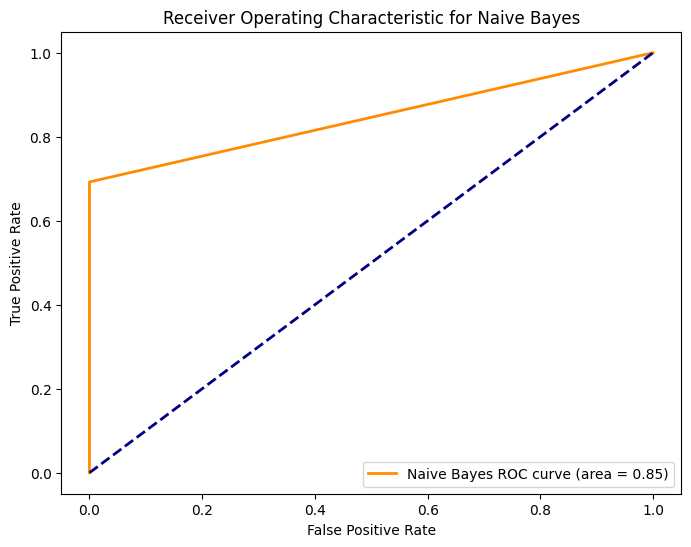

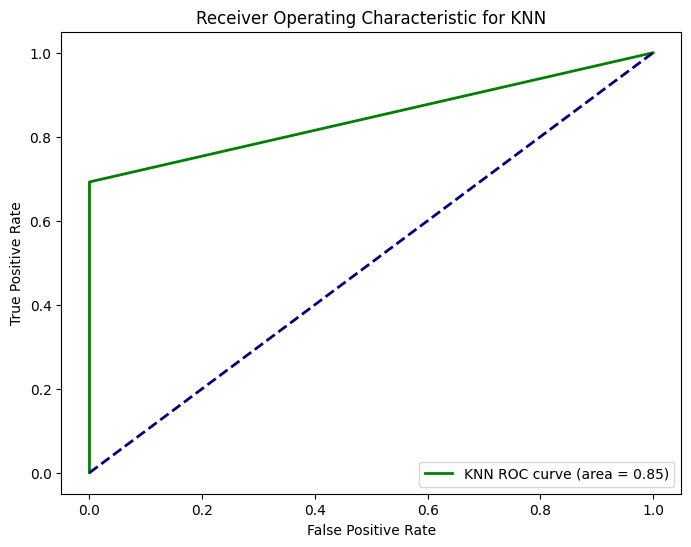

In [49]:
nb_probabilities = nb_classifier.predict(X_test)
knn_probabilities = knn_classifier.predict(X_test)

# Calculate ROC curve and ROC area for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probabilities)
nb_roc_auc = auc(nb_fpr, nb_tpr)

# Calculate ROC curve and ROC area for KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probabilities)
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Plotting the ROC curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='darkorange', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Optional: Plotting ROC curve for KNN for comparison
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label='KNN ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()